In [2]:
import pandas as pd
import seaborn as sns

## Challenge 1

In [59]:
df_5_w1 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_190504.txt')
df_5_w2 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_190511.txt')
df_5_w3 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_190518.txt')
df_5_w4 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_190525.txt')
df_6_w1 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_190601.txt')
df_6_w2 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_190608.txt')
df_5_w1.shape

(206857, 11)

In [128]:
df = pd.concat([df_5_w1, df_5_w2, df_5_w3, df_5_w4, df_6_w1, df_6_w2]).reset_index()
df.shape

(1231795, 12)

In [125]:
df.head()

,index,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,0,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/27/2019,00:00:00,REGULAR,7035249,2384833
1,1,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/27/2019,04:00:00,REGULAR,7035269,2384840
2,2,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/27/2019,08:00:00,REGULAR,7035292,2384875
3,3,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/27/2019,12:00:00,REGULAR,7035392,2384951
4,4,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/27/2019,16:00:00,REGULAR,7035651,2385020


## Challenge 2

In [165]:
#concat date and time columns
#df['DATETIME'] = df['DATE'] + " " + df['TIME']
df['DATE'] = pd.to_datetime(df['DATE'])
df['TIME'] = pd.to_datetime(df['TIME'])
df = df.drop(columns = 'index')
df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')

## Challenge 3

In [200]:
df_group = df.groupby(['C/A', 'UNIT', 'SCP', 'STATION', 'DATE']).agg('sum').reset_index()
#df_group[df_group.STATION == 'GRAND CENTRAL']
#df_group.STATION.unique()

### Challenge 4

In [175]:
%matplotlib inline

In [176]:
import matplotlib.pyplot as plt

In [208]:
single_turn = df_group[(df_group['C/A'] == 'R236') & (df_group['UNIT'] == 'R045') & 
                       (df_group['SCP'] == '00-00-00') & (df_group['STATION'] == 'GRD CNTRL-42 ST')]

array(['R045'], dtype=object)

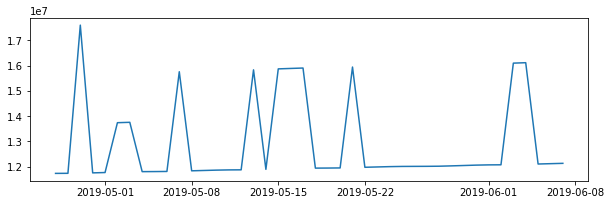

In [207]:
plt.figure(figsize=(10,3))
plt.plot(single_turn['DATE'],single_turn['ENTRIES'])
#plt.ylim((4.21e7,4.26e7))

In [210]:
df_group[df_group.STATION == 'GRD CNTRL-42 ST'].UNIT.unique()

array(['R045', 'R046', 'R047', 'R048'], dtype=object)

In [211]:
df_group[df_group.STATION == 'GRD CNTRL-42 ST']['C/A'].unique()

array(['R236', 'R237', 'R237B', 'R238', 'R238A', 'R240', 'R241A'],
      dtype=object)

In [214]:
df_group[df_group.STATION == 'GRD CNTRL-42 ST'].SCP.unique()

array(['00-00-00', '00-00-01', '00-00-02', '00-00-03', '00-00-04',
       '00-00-05', '00-03-00', '00-03-01', '00-03-02', '00-03-03',
       '00-06-00', '00-06-01', '01-00-00', '01-00-01', '01-00-02',
       '01-00-03', '01-00-04', '01-00-05', '01-00-06', '00-00-06',
       '00-00-07', '00-03-04', '00-05-00', '00-05-01', '00-06-02',
       '02-00-00', '02-00-01', '02-00-02', '02-00-03', '02-00-04',
       '02-03-00', '02-03-01', '02-03-02', '00-03-05', '00-03-06',
       '00-03-07', '00-03-08'], dtype=object)